In [16]:
%pip install pretty_midi

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 32.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for mido>=1.1.16 from https://files.pythonhosted.org/packages/39/2c/df005c4b310dde2c834431032139bf2c3924f81798013feb052d1afd543b/mido-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for packaging~=23.1 from https://files.pythonhosted.org/packages/ec/1a/610693ac4ee14fcdf2d9bf3c493370e4f2ef7ae2e19217d7a237ff42367d/packaging-23.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592288 sha256=40b43b1ddd80a42ae0f338570e4039e11f000f7f4e45e866ab638d6dfbf15bfd
  Stored in directory: /Users/I523193/Library/Caches/pip/wheels/e6/95/ac/15ce

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

import pretty_midi

## Data preprocessing

In [40]:
composer_list = ['Bach', 'Beethoven', 'Chopin', 'Mozart']
data = []

In [41]:
def midi_to_piano_roll(midi_path):
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    piano_roll = midi_data.get_piano_roll(fs=100)  # fs is the sampling frequency
    return piano_roll

In [42]:
for composer in composer_list:
    for dirname, _, filenames in os.walk(f'./data/{composer}/'):
        for filename in filenames:
            if filename.endswith('.mid'):
                midi_path = os.path.join(dirname, filename)
                piano_roll_file = filename.replace('.mid', '.npy')
                piano_roll_path = os.path.join(dirname, piano_roll_file)
                
                # only create piano roll if it doesn't exist
                if not os.path.exists(piano_roll_path):
                    # Convert to piano roll
                    try: 
                        piano_roll = midi_to_piano_roll(midi_path)
                        np.save(piano_roll_path, piano_roll)
                    except:
                        print(f'Error converting {midi_path} to piano roll')
                        piano_roll_path = None 

                data.append({
                    'midi_file': filename,
                    'path': dirname,
                    'composer': composer,
                    'piano_roll_file': piano_roll_file
                })


Error converting ./data/Beethoven/Anhang 14-3.mid to piano roll
Error converting ./data/Mozart/Piano Sonatas/Nueva carpeta/K281 Piano Sonata n03 3mov.mid to piano roll


In [47]:
df = pd.DataFrame(data)
df.head()

,midi_file,path,composer,piano_roll_file
0,Bwv0997 Partita for Lute 1mov.mid,./data/Bach/,Bach,Bwv0997 Partita for Lute 1mov.npy
1,Bwv0535 Prelude and Fugue.mid,./data/Bach/,Bach,Bwv0535 Prelude and Fugue.npy
2,Bwv0806 English Suite n1 05mov.mid,./data/Bach/,Bach,Bwv0806 English Suite n1 05mov.npy
3,Bwv0998 Prelude Fugue Allegro for Lute 3mov.mid,./data/Bach/,Bach,Bwv0998 Prelude Fugue Allegro for Lute 3mov.npy
4,Jesu Joy of Man Desiring.mid,./data/Bach/,Bach,Jesu Joy of Man Desiring.npy


In [50]:
print(df.shape)
print(df.isna().sum())

(1530, 4)
midi_file          0
path               0
composer           0
piano_roll_file    0
dtype: int64


In [51]:
# Dropping the midi files that could not be converted to piano rolls
df.dropna(inplace=True)
print(df.shape)

(1530, 4)


<Axes: >

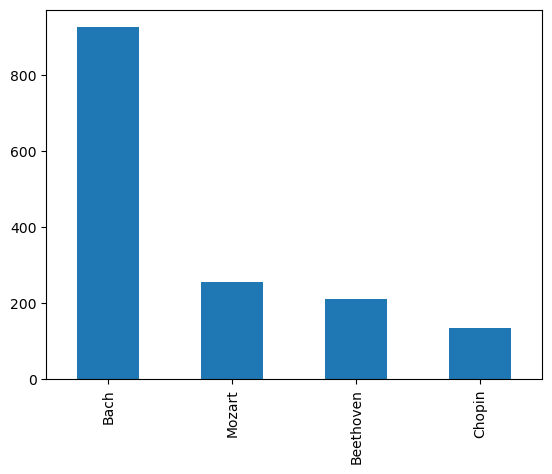

In [52]:
df['composer'].value_counts().plot(kind='bar')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   midi_file        1530 non-null   object
 1   path             1530 non-null   object
 2   composer         1530 non-null   object
 3   piano_roll_file  1530 non-null   object
dtypes: object(4)
memory usage: 47.9+ KB


In [56]:
df.to_csv('./data/preprocessed_data_with_piano_rolls.csv', index=False)